In [1]:
import pandas as pd
import numpy as np
ROWS_PER_FRAME = 543

def load_relevent_data_subset(pq_path):
    data_columns = ['x','y','z']
    data = pd.read_parquet(pq_path,columns=data_columns)
    n_frames = int(len(data) / ROWS_PER_FRAME)
    data = data.values.reshape(n_frames, ROWS_PER_FRAME,len(data_columns))
    return data.astype(np.float32)

In [2]:
load_relevent_data_subset('output2.parquet')

array([[[ 0.558105  ,  0.3738169 , -0.02968689],
        [ 0.55834436,  0.3331769 , -0.04149305],
        [ 0.55865806,  0.34917548, -0.02508285],
        ...,
        [        nan,         nan,         nan],
        [        nan,         nan,         nan],
        [        nan,         nan,         nan]],

       [[ 0.55694515,  0.41231775, -0.03079462],
        [ 0.5564365 ,  0.36877692, -0.04249431],
        [ 0.55737454,  0.38515845, -0.02574633],
        ...,
        [        nan,         nan,         nan],
        [        nan,         nan,         nan],
        [        nan,         nan,         nan]],

       [[ 0.55694866,  0.378683  , -0.03091444],
        [ 0.55627644,  0.33676633, -0.0418042 ],
        [ 0.55696857,  0.3536512 , -0.02569909],
        ...,
        [        nan,         nan,         nan],
        [        nan,         nan,         nan],
        [        nan,         nan,         nan]],

       ...,

       [[ 0.54048127,  0.4040297 , -0.02856884],
        [ 0

In [2]:
# train = pd.read_csv('train.csv')
# xyz = pd.read_parquet('output.parquet')

In [9]:
# xyz.query('frame==22')['type'].value_counts()

face          468
pose           33
left_hand      21
right_hand     21
Name: type, dtype: int64

we have 468 faces data points</br>
33 for pose </br>
left hand 21</br>
right hand 21 </br>

In [3]:
xyz.head(20)

,type,landmark_index,frame,x,y,z
0,face,0,1,NaN,NaN,NaN
1,face,1,1,NaN,NaN,NaN
2,face,2,1,NaN,NaN,NaN
3,face,3,1,NaN,NaN,NaN
4,face,4,1,NaN,NaN,NaN
5,face,5,1,NaN,NaN,NaN
6,face,6,1,NaN,NaN,NaN
7,face,7,1,NaN,NaN,NaN
8,face,8,1,NaN,NaN,NaN
9,face,9,1,NaN,NaN,NaN


In [11]:
# train.query('sequence_id==635217')

,path,participant_id,sequence_id,sign
85625,train_landmark_files/2044/635217.parquet,2044,635217,brother


In [21]:
# !pip install tflite-runtime

/bin/bash: /home/lang_chain/anaconda3/lib/libtinfo.so.6: no version information available (required by /bin/bash)
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


In [48]:
import tensorflow as tf
interpreter = tf.lite.Interpreter("./model.tflite")
interpreter = tf.lite.Interpreter(model_path="./model.tflite")

found_signatures = list(interpreter.get_signature_list().keys())
prediction_fn = interpreter.get_signature_runner("serving_default")

In [13]:
# prediction_fn = interpreter.get_signature_runner("serving_default")

In [8]:
# pq_file = './2044/635217.parquet'
# xyz_np = load_relevent_data_subset(pq_file)

In [10]:
# prediction_fn = interpreter.get_signature_runner("serving_default")
# prediction_fn(inputs=xyz_np)

{'outputs': array([8.2630757e-04, 1.1574279e-03, 1.0878340e-03, 4.0942599e-04,
        8.8040339e-04, 6.6904561e-04, 2.4809875e-03, 4.0131463e-03,
        1.5915242e-03, 4.9587677e-04, 1.3368839e-03, 5.3496391e-04,
        9.3763153e-04, 1.0667446e-03, 6.0358184e-04, 6.5127551e-04,
        1.5723179e-03, 1.0792783e-03, 8.1083243e-04, 1.4543679e-03,
        6.6121027e-04, 6.8855420e-04, 5.0601497e-04, 1.0747425e-03,
        7.6580845e-04, 9.6730795e-04, 1.2704460e-03, 9.3057530e-04,
        9.8573382e-04, 7.6114922e-04, 7.4904406e-01, 7.6662243e-04,
        1.3530154e-03, 5.8980426e-04, 7.1381702e-04, 8.1401644e-04,
        4.6472577e-04, 6.6550547e-04, 8.7242184e-04, 6.2099140e-04,
        1.0595353e-03, 6.0205947e-04, 5.9172261e-04, 7.2709133e-04,
        1.0631386e-03, 5.9057196e-04, 6.0175295e-04, 1.2555065e-03,
        2.0529306e-03, 7.6171313e-04, 1.6638526e-03, 4.3165716e-04,
        7.2850345e-04, 6.2836509e-04, 6.3021114e-04, 1.5929902e-03,
        6.1725575e-04, 1.2311066e-03,

In [42]:
# predictions = prediction_fn(inputs=xyz_np)

In [13]:
# predictions['outputs'].shape

(250,)

we are trying to predict 250 signs

<Axes: >

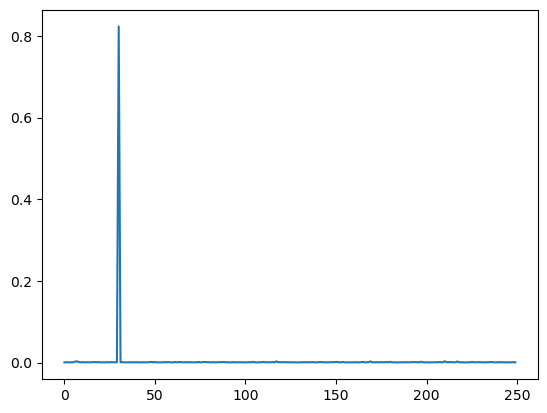

In [14]:
# pd.Series(predictions['outputs']).plot()

<Axes: >

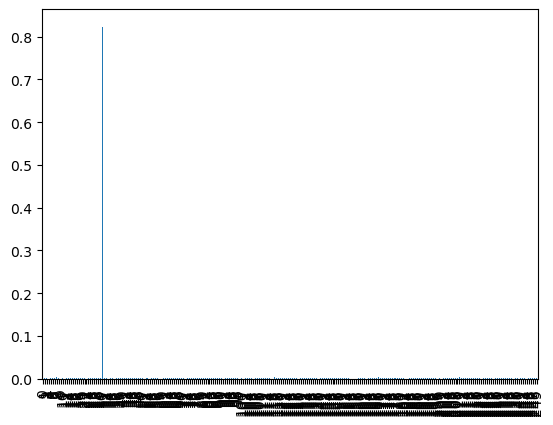

In [15]:
# pd.Series(predictions['outputs']).plot(kind='bar')

In [43]:
# #one sign is spiking off
# prediction_fn(inputs=xyz_np)
# sign = predictions['outputs'].argmax()

In [18]:
# train = pd.read_csv('train.csv')

# # Add ordinally Encoded Sign (assign number to each sign name)
# train['sign_ord'] = train['sign'].astype('category').cat.codes

# # Dictionaries to translate sign <-> ordinal encoded sign
# SIGN2ORD = train[['sign', 'sign_ord']].set_index('sign').squeeze().to_dict()
# ORD2SIGN = train[['sign_ord', 'sign']].set_index('sign_ord').squeeze().to_dict()

# pq_file = './2044/635217.parquet'
# xyz_np = load_relevent_data_subset(pq_file)
# #one sign is spiking off
# prediction_fn(inputs=xyz_np)
# sign = predictions['outputs'].argmax()

In [44]:
ORD2SIGN[sign]

'brother'

<Axes: >

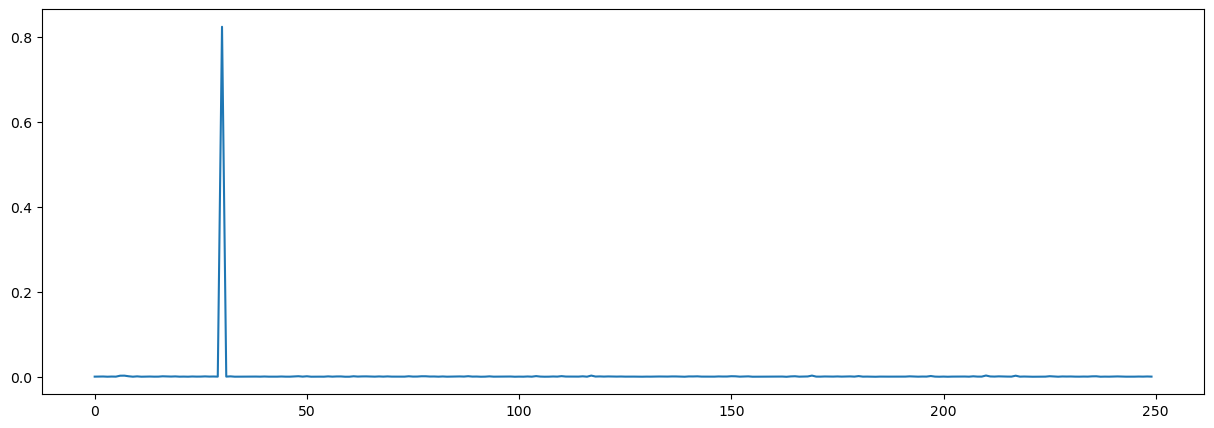

In [20]:
pd.Series(predictions['outputs']).plot(figsize=(15,5))

In [1]:
import pandas as pd
import cv2
import mediapipe as mp
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_holistic = mp.solutions.holistic



def create_landmark_frame_df(results,frame,xyz):
    """
    xyz takes the results from mediapipe and creates a dataframe of the landmark
    
    inputs:
        results: mediapipe results object
        frame: frame number
        xyz: dataframe wof the xyz example data
    
    
    """
    
    #we want the values and rows for every type landmark index so we need skeleton
    xyz_skel = xyz[['type','landmark_index']].drop_duplicates() \
    .reset_index(drop=True).copy()
    
    pose = pd.DataFrame()
    face = pd.DataFrame()
    left_hand = pd.DataFrame()
    right_hand = pd.DataFrame()
    
    if results.face_landmarks is not None:
        for i, point in enumerate(results.face_landmarks.landmark):
            face.loc[i, ['x','y','z']] = [point.x, point.y, point.z]

    if results.pose_landmarks is not None:
        for i, point in enumerate(results.pose_landmarks.landmark):
            pose.loc[i, ['x','y','z']] = [point.x, point.y, point.z]


    if results.left_hand_landmarks is not None:
        for i, point in enumerate(results.left_hand_landmarks.landmark):
            left_hand.loc[i, ['x','y','z']] = [point.x, point.y, point.z]


    if results.right_hand_landmarks is not None:
        for i, point in enumerate(results.right_hand_landmarks.landmark):
            right_hand.loc[i, ['x','y','z']] = [point.x, point.y, point.z]

    face = face.reset_index() \
    .rename(columns={'index': 'landmark_index'}) \
    .assign(type='face')

    pose = pose.reset_index() \
    .rename(columns={'index': 'landmark_index'}) \
    .assign(type='pose')

    left_hand = left_hand.reset_index() \
    .rename(columns={'index': 'landmark_index'}) \
    .assign(type='left_hand')

    right_hand = right_hand.reset_index() \
    .rename(columns={'index': 'landmark_index'}) \
    .assign(type='right_hand')

    landmark = pd.concat([face,pose,left_hand,right_hand]).reset_index(drop=True)
    #merge with lanndmark
    landmark = xyz_skel.merge(landmark, on=['type','landmark_index'], how='left')
    #assign frames to make it unique
    landmark = landmark.assign(frame = frame)
    return landmark



def do_capture_web(xyz):
    all_landmarks = []

    cap = cv2.VideoCapture(0)
    with mp_holistic.Holistic(min_detection_confidence=0.5,min_tracking_confidence=0.5) as holistic:
        frame = 0  
        while cap.isOpened():
                #take frame and increment it
            frame+=1
            success, image = cap.read()
            if not success:
                print("Ignoring empty camera frame.")
                    # If loading a video, use 'break' instead of 'continue'.
                continue

                # To improve performance, optionally mark the image as not writeable to
                # pass by reference.
            image.flags.writeable = False
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            results = holistic.process(image)
            #create landmark dataframe
            landmark = create_landmark_frame_df(results, frame, xyz)
            all_landmarks.append(landmark)

            # Draw landmark annotation on the image.
            image.flags.writeable = True
            image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

            mp_drawing.draw_landmarks(
                image,
                results.face_landmarks,
                mp_holistic.FACEMESH_CONTOURS,
                landmark_drawing_spec=None,
                connection_drawing_spec=mp_drawing_styles
                .get_default_face_mesh_contours_style())

            mp_drawing.draw_landmarks(
                image,
                results.pose_landmarks,
                mp_holistic.POSE_CONNECTIONS,
                landmark_drawing_spec=mp_drawing_styles
                .get_default_pose_landmarks_style())

            mp_drawing.draw_landmarks(
                image,
                results.left_hand_landmarks,
                mp_holistic.HAND_CONNECTIONS,
                landmark_drawing_spec=mp_drawing_styles
                .get_default_hand_landmarks_style())

            mp_drawing.draw_landmarks(
                image,
                results.right_hand_landmarks,
                mp_holistic.HAND_CONNECTIONS,
                landmark_drawing_spec=mp_drawing_styles
                .get_default_hand_landmarks_style())

                # Flip the image horizontally for a selfie-view display.
            cv2.imshow('MediaPipe Holistic', cv2.flip(image, 1))
            if cv2.waitKey(5) & 0xFF == 27:
                break
                

    return all_landmarks    

if __name__ == "__main__":
    xyz = pd.read_parquet('./2044/635217.parquet')
    landmark = do_capture_web(xyz)
    landmark = pd.concat(landmark).reset_index(drop=True)
    landmark.to_parquet('output.parquet')



2023-08-06 20:04:46.575974: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-06 20:04:47.074302: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
INFO: Created TensorFlow Lite XNNPACK delegate for CPU.
QObject::moveToThread: Current thread (0x6aa2eb0) is not the object's thread (0x6a3b650).
Cannot move to target thread (0x6aa2eb0)

QObject::moveToThread: Current thread (0x6aa2eb0) is not the object's thread (0x6a3b650).
Cannot move to target thread (0x6aa2eb0)

QObject::moveToThread: Current thread (0x6aa2eb0) is not the object's thread (0x6a3b650).
Cannot move to target thread (0x6aa2eb0)

QObject::moveToThread: Current thread (0x6aa2eb0) is not the object's thread (0x6a3b650).
Cannot move to target 

In [2]:
!ls

/bin/bash: /home/lang_chain/anaconda3/lib/libtinfo.so.6: no version information available (required by /bin/bash)
2044		inference.ipynb  output.parquet  train.csv
complete.ipynb	model.tflite	 Team-Vision


In [3]:
import tensorflow as tf
interpreter = tf.lite.Interpreter(model_path="./model.tflite")

found_signatures = list(interpreter.get_signature_list().keys())
prediction_fn = interpreter.get_signature_runner("serving_default")

2023-08-07 18:19:12.964254: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-07 18:19:13.459063: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [4]:
pq_file = 'output2.parquet'
xyz_np = load_relevent_data_subset(pq_file)

In [5]:
xyz_np

array([[[ 0.558105  ,  0.3738169 , -0.02968689],
        [ 0.55834436,  0.3331769 , -0.04149305],
        [ 0.55865806,  0.34917548, -0.02508285],
        ...,
        [        nan,         nan,         nan],
        [        nan,         nan,         nan],
        [        nan,         nan,         nan]],

       [[ 0.55694515,  0.41231775, -0.03079462],
        [ 0.5564365 ,  0.36877692, -0.04249431],
        [ 0.55737454,  0.38515845, -0.02574633],
        ...,
        [        nan,         nan,         nan],
        [        nan,         nan,         nan],
        [        nan,         nan,         nan]],

       [[ 0.55694866,  0.378683  , -0.03091444],
        [ 0.55627644,  0.33676633, -0.0418042 ],
        [ 0.55696857,  0.3536512 , -0.02569909],
        ...,
        [        nan,         nan,         nan],
        [        nan,         nan,         nan],
        [        nan,         nan,         nan]],

       ...,

       [[ 0.54048127,  0.4040297 , -0.02856884],
        [ 0

In [6]:
predictions = prediction_fn(inputs=xyz_np)
sign = predictions['outputs'].argmax()

In [7]:
train = pd.read_csv('train.csv')

# Add ordinally Encoded Sign (assign number to each sign name)
train['sign_ord'] = train['sign'].astype('category').cat.codes

# Dictionaries to translate sign <-> ordinal encoded sign
SIGN2ORD = train[['sign', 'sign_ord']].set_index('sign').squeeze().to_dict()
ORD2SIGN = train[['sign_ord', 'sign']].set_index('sign_ord').squeeze().to_dict()


In [8]:
ORD2SIGN[sign]

'shhh'

In [40]:
len(xyz_np)

array([[[ 0.4382507 ,  0.44945267, -0.04782642],
        [ 0.41452745,  0.40488026, -0.0719939 ],
        [ 0.42374513,  0.42068115, -0.0421453 ],
        ...,
        [ 0.2902567 ,  0.37456954, -0.09410129],
        [ 0.26241904,  0.4016329 , -0.08036179],
        [ 0.22600418,  0.40105012, -0.07119217]],

       [[ 0.43752682,  0.4497275 , -0.05009165],
        [ 0.41823912,  0.40269876, -0.07067561],
        [ 0.42743474,  0.4193755 , -0.04211733],
        ...,
        [ 0.29772687,  0.37150085, -0.08177623],
        [ 0.2715149 ,  0.39880553, -0.07532769],
        [ 0.23832977,  0.39925954, -0.06912725]],

       [[ 0.44016373,  0.44803554, -0.05107539],
        [ 0.4215613 ,  0.40077615, -0.0717376 ],
        [ 0.43067482,  0.41782278, -0.04289455],
        ...,
        [ 0.302016  ,  0.37267876, -0.07840148],
        [ 0.27640018,  0.4002117 , -0.07230154],
        [ 0.2449699 ,  0.40115467, -0.06615055]],

       ...,

       [[ 0.4447866 ,  0.44697464, -0.04663257],
        [ 0

In [34]:
for frame, data in enumerate(xyz_np):
    print(data[0])

[ 0.4382507   0.44945267 -0.04782642]
[ 0.43752682  0.4497275  -0.05009165]
[ 0.44016373  0.44803554 -0.05107539]
[ 0.443623    0.4494399  -0.04767749]
[ 0.4447866   0.44697464 -0.04663257]
[ 0.4478016   0.4389317  -0.05117838]
[ 0.4504552   0.43477714 -0.05376567]


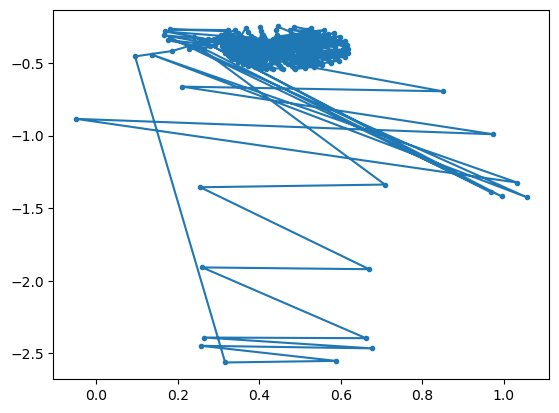

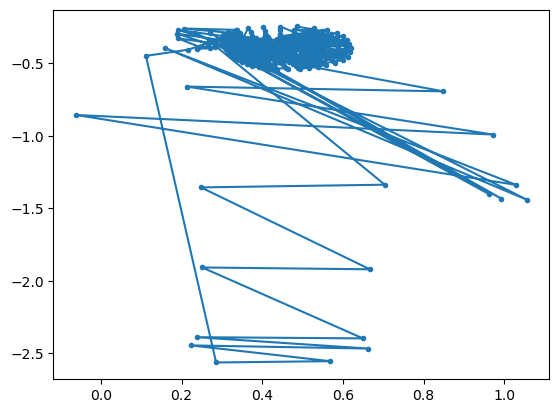

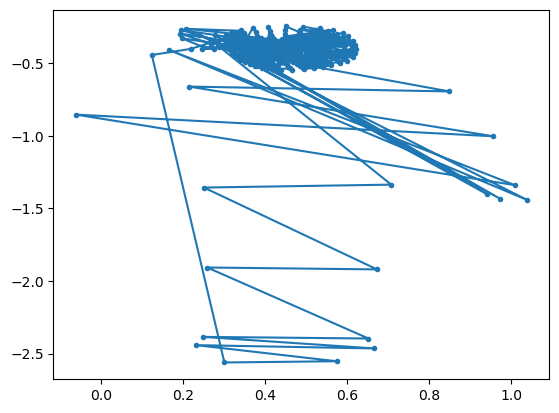

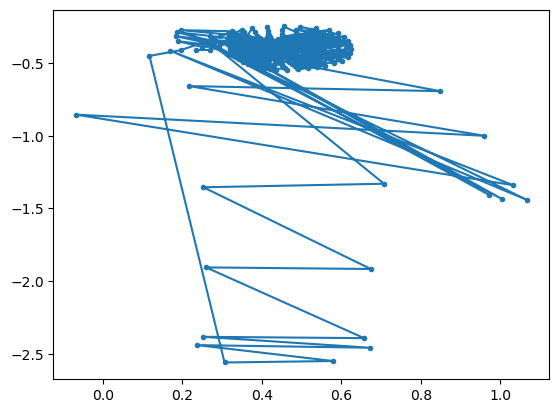

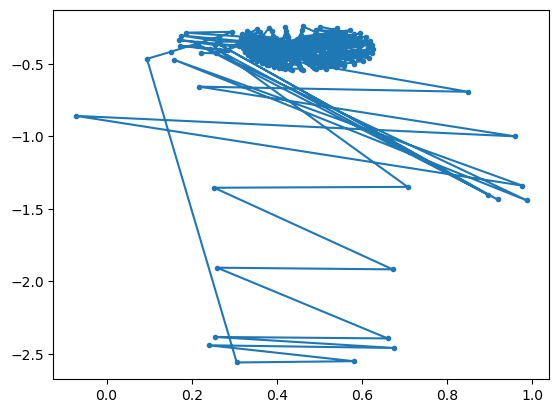

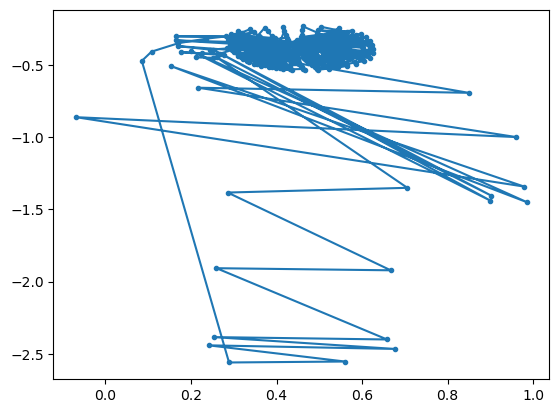

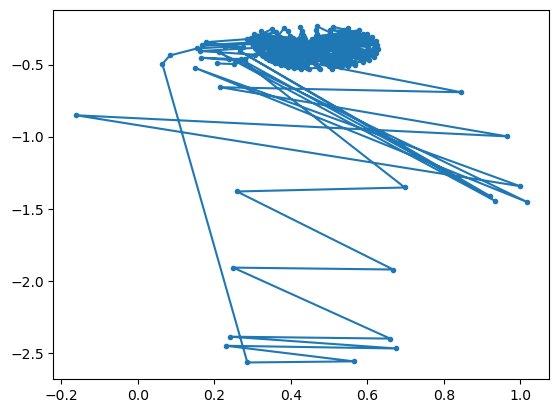

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

for frame, data in enumerate(xyz_np):
    df_temp = pd.DataFrame(data, columns=['x', 'y', 'z'])  # Removed [0] indexing from 'data'
    df_temp['y'] = -df_temp['y']

    # Plot using matplotlib
    plt.plot(df_temp['x'], df_temp['y'], marker='.')
    plt.show()


In [19]:
import pandas as pd

# Create a sample DataFrame
data = {
    'type': ['face', 'face', 'face'],
    'landmark_index': [0, 1, 2],
    'x': [0.552397, 0.553785, 0.554328],
    'y': [0.761916, 0.703709, 0.723656],
    'z': [-0.037648, -0.062006, -0.035008],
    'frame': [20, 20, 20]
}

df = pd.DataFrame(data)

# Convert DataFrame to a list of dictionaries
all_landmarks = df.to_dict(orient='records')

print(len(df))              # Output: 3 (number of rows in the DataFrame)
print(len(all_landmarks))   # Output: 3 (number of dictionaries in the list)


3
3


In [ ]:
import cv2

# Initialize video capture from webcam (change 0 to the appropriate camera index)
cap = cv2.VideoCapture(0)

# Read the first frame
ret, prev_frame = cap.read()

while True:
    # Read the current frame
    ret, current_frame = cap.read()
    
    if not ret:
        break
    
    # Convert frames to grayscale for frame differencing
    prev_gray = cv2.cvtColor(prev_frame, cv2.COLOR_BGR2GRAY)
    current_gray = cv2.cvtColor(current_frame, cv2.COLOR_BGR2GRAY)
    
    # Calculate the absolute difference between frames
    frame_diff = cv2.absdiff(prev_gray, current_gray)
    
    # Apply thresholding to highlight differences
    _, thresh = cv2.threshold(frame_diff, 30, 255, cv2.THRESH_BINARY)
    
    # Display the thresholded frame
    cv2.imshow('Frame Difference', thresh)
    
    # Update the previous frame
    prev_frame = current_frame
    
    # Exit loop on 'q' key press
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the video capture
cap.release()
cv2.destroyAllWindows()


QObject::moveToThread: Current thread (0x6ed9dd0) is not the object's thread (0x73bd4d0).
Cannot move to target thread (0x6ed9dd0)

QObject::moveToThread: Current thread (0x6ed9dd0) is not the object's thread (0x73bd4d0).
Cannot move to target thread (0x6ed9dd0)

QObject::moveToThread: Current thread (0x6ed9dd0) is not the object's thread (0x73bd4d0).
Cannot move to target thread (0x6ed9dd0)

QObject::moveToThread: Current thread (0x6ed9dd0) is not the object's thread (0x73bd4d0).
Cannot move to target thread (0x6ed9dd0)

QObject::moveToThread: Current thread (0x6ed9dd0) is not the object's thread (0x73bd4d0).
Cannot move to target thread (0x6ed9dd0)

QObject::moveToThread: Current thread (0x6ed9dd0) is not the object's thread (0x73bd4d0).
Cannot move to target thread (0x6ed9dd0)

QObject::moveToThread: Current thread (0x6ed9dd0) is not the object's thread (0x73bd4d0).
Cannot move to target thread (0x6ed9dd0)

QObject::moveToThread: Current thread (0x6ed9dd0) is not the object's thread